USA Accidents Exploratory Data Analysis
1. Data Preparation and Cleaning
2. Exploratory analysis and Visualization
3. Summary and Conclusions

In [1]:
# Importing necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
# Reading the US Accidents dataset and displaying the first few rows to understand the structure
df=pd.read_csv('USAccidents.csv',encoding='latin-1')
# Print the first 5 rows of the dataset to preview the data
print(df.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [3]:
# Data Preparation and Cleaning
# Fix missing, incorrect, or null values
# Display column names to understand the structure of the dataset
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
# Display a summary of the dataset including structure, column names, data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
# Display a statistical summary of numerical columns
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [6]:
# Count missing values in each column
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [7]:
# Get all numerical columns by selecting specific data types
numerics=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df=df.select_dtypes(include=numerics)
# Number of numerical columns
len(num_df.columns)

13

In [8]:
# Check for missing values as a boolean dataframe (True/False)
df.isna()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7728390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7728391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7728392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Find the count of missing values in each column
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [10]:
# Calculate the percentage of missing values per column
Missing_percentage = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)

# Display the percentage of missing values for each column
print(Missing_percentage)

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

<Axes: >

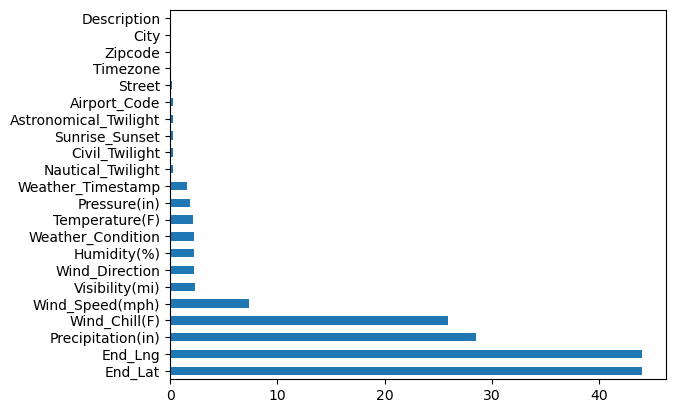

In [11]:
# Visualize columns with missing data using a horizontal bar chart
Missing_percentage[Missing_percentage!=0].plot(kind='barh')

#Cities

In [13]:
# Analyze the distribution of accidents by city
cities= df.City.value_counts()
# Display the frequency of accidents in each city
print(cities)
# Get unique values of accident counts in cities and count the number of unique cities
print(cities.unique())
print(len(cities))

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64
[186917 169609 156491 ...      3      2      1]
13678


In [14]:
# Display the top 20 cities with the highest number of accidents
cities[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

In [18]:
# Check the type of the `cities` object
type(cities)

pandas.core.series.Series

<Axes: ylabel='City'>

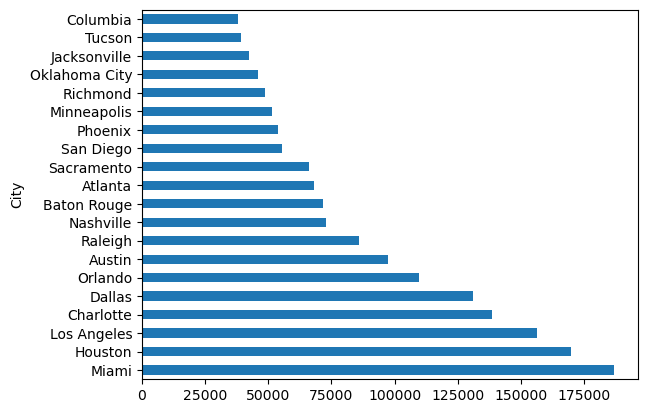

In [15]:
# Visualize the top 20 cities with the highest number of accidents using a horizontal bar chart
cities[:20].plot(kind='barh')

In [17]:
import seaborn as sns
# Set a dark grid theme for Seaborn visualizations
sns.set_style("darkgrid")

C:\Users\amith\AppData\Local\Temp\ipykernel_23428\3845131195.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities)


<Axes: xlabel='count', ylabel='Density'>

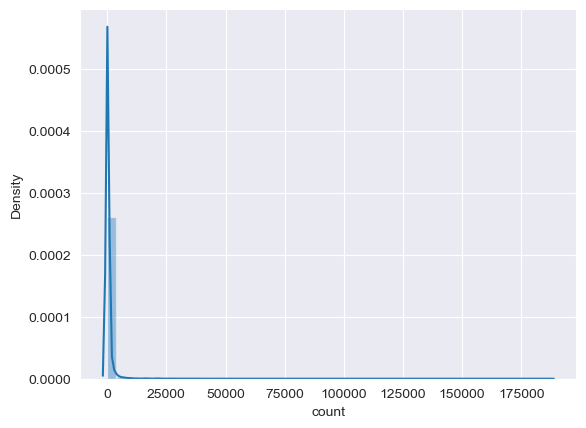

In [20]:
# Visualize the distribution of accident counts across cities
sns.distplot(cities)

<Axes: xlabel='count', ylabel='Count'>

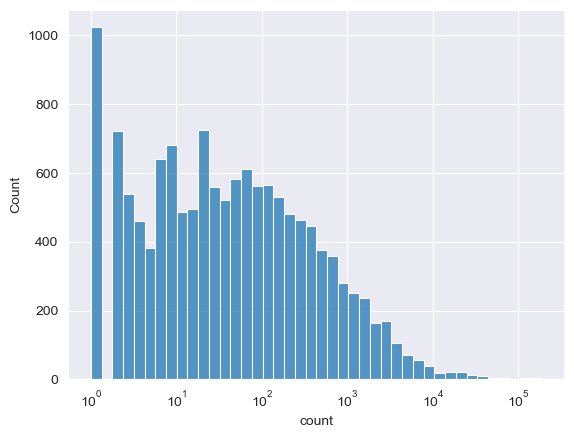

In [30]:
# Visualize the distribution of accident counts across cities
sns.histplot(cities, log_scale=True)

In [21]:
# Analyze high-accident cities (1000 or more accidents)
high_acc_cities=cities[cities>=1000]
# Analyze low-accident cities (fewer than 1000 accidents)
low_acc_cities=cities[cities<1000]

In [147]:
# Proportion of high-accident cities
len(high_acc_cities)/len(cities)

C:\Users\amith\AppData\Local\Temp\ipykernel_23428\897794027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_acc_cities)


<Axes: xlabel='count', ylabel='Density'>

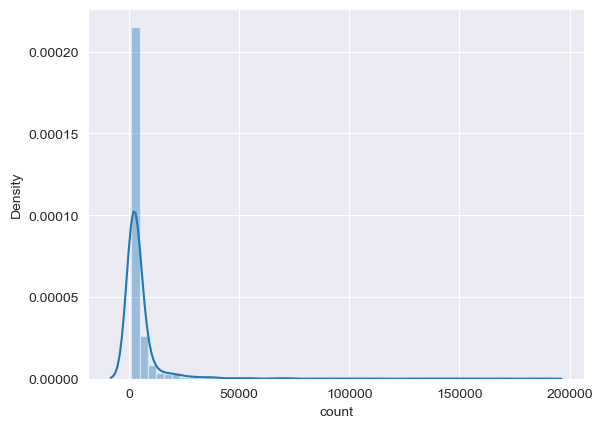

In [26]:
# Analyze the distribution of accidents for high-accident cities
sns.distplot(high_acc_cities)

In [27]:
# Proportion of low-accident cities
len(low_acc_cities)/len(cities)

0.9109518935516888

C:\Users\amith\AppData\Local\Temp\ipykernel_23428\897794027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_acc_cities)


<Axes: xlabel='count', ylabel='Density'>

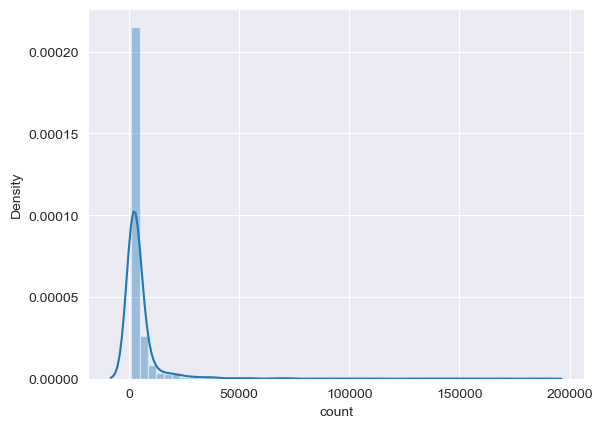

In [28]:
# Analyze the distribution of accidents for high-accident cities
sns.distplot(high_acc_cities)

In [31]:
# Analyze cities with only one reported accident
cities[cities==1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

#Start Time

In [50]:
df.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7667550, dtype: datetime64[ns]

In [52]:
# Convert `Start_Time` to datetime format
pd.to_datetime(df.Start_Time)

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7667550, dtype: datetime64[ns]

In [148]:
# Analyze the distribution of accidents by hour of the day
sns.histplot(df.Start_Time.dt.hour, bins=24, kde=False)

<Axes: xlabel='Start_Time', ylabel='Count'>

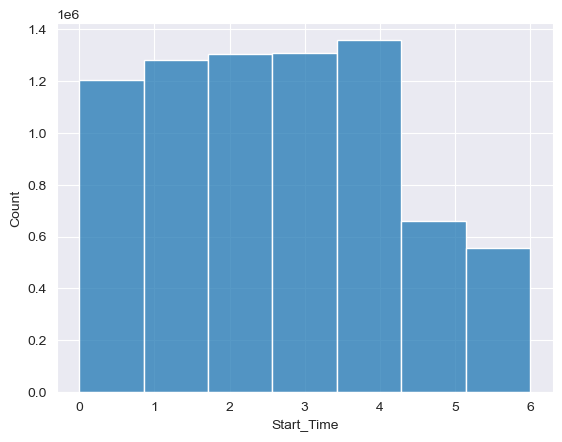

In [70]:
# Analyze the distribution of accidents by day of the week (0 = Monday, 6 = Sunday)
sns.histplot(df.Start_Time.dt.dayofweek, bins=7, kde=False)

In [72]:
# Analyze accidents on Sundays
df.Start_Time.dt.dayofweek==6

0          False
1          False
2          False
3          False
4          False
           ...  
7728389    False
7728390    False
7728391    False
7728392    False
7728393    False
Name: Start_Time, Length: 7667550, dtype: bool

C:\Users\amith\AppData\Local\Temp\ipykernel_23428\1907868886.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_ST.dt.hour, bins=24, kde=False)


<Axes: xlabel='Start_Time'>

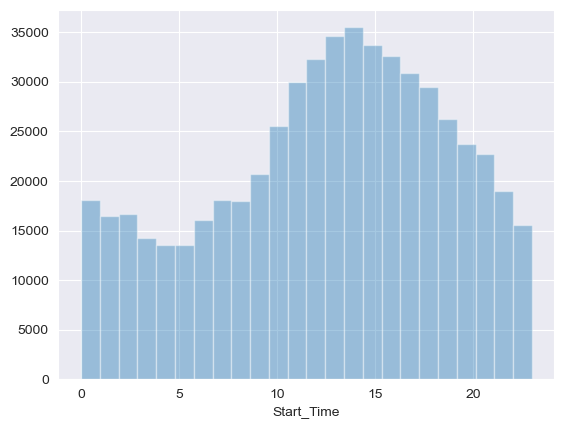

In [76]:
sundays_ST=df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sundays_ST.dt.hour, bins=24, kde=False)

C:\Users\amith\AppData\Local\Temp\ipykernel_23428\1489889255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saturday_ST.dt.hour, bins=24, kde=False)


<Axes: xlabel='Start_Time'>

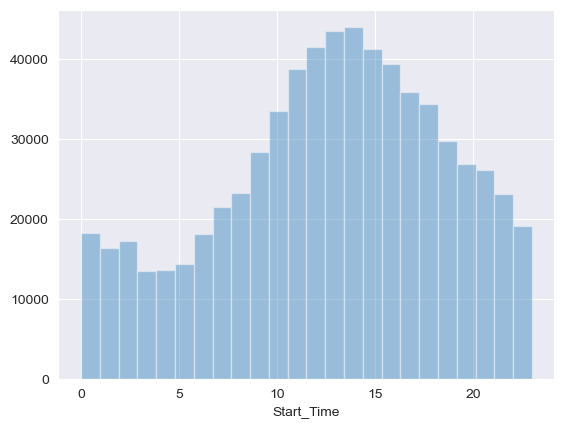

In [77]:
# Analyze accidents on Saturdays
saturday_ST=df.Start_Time[df.Start_Time.dt.dayofweek==5]
sns.distplot(saturday_ST.dt.hour, bins=24, kde=False)

C:\Users\amith\AppData\Local\Temp\ipykernel_23428\4253661978.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Monday_ST.dt.hour, bins=24, kde=False)


<Axes: xlabel='Start_Time'>

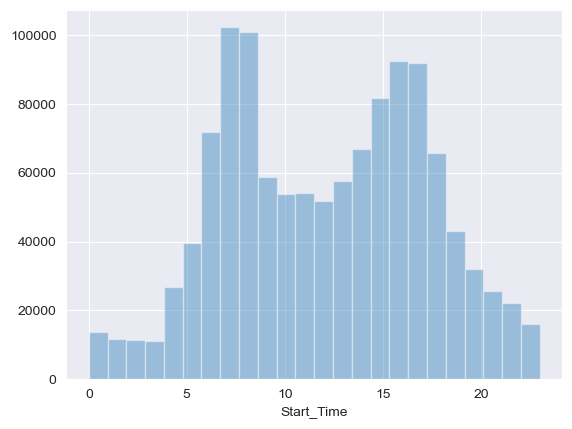

In [149]:
# Analyze accidents on Mondays
Monday_ST=df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(Monday_ST.dt.hour, bins=24, kde=False)

C:\Users\amith\AppData\Local\Temp\ipykernel_23428\150942076.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Monday_ST.dt.month, bins=12, kde=False)


<Axes: xlabel='Start_Time'>

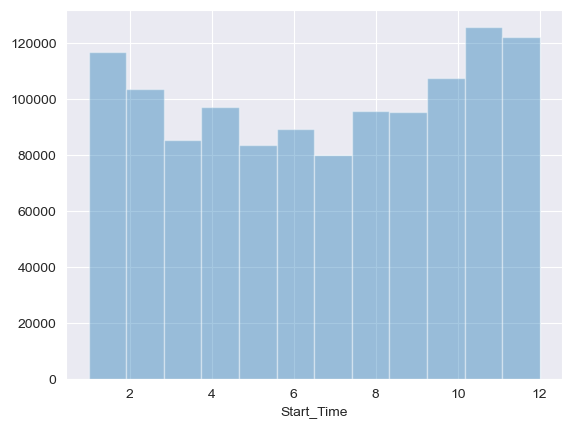

In [80]:
# Analyze accidents by month
sns.distplot(Monday_ST.dt.month, bins=12, kde=False)

C:\Users\amith\AppData\Local\Temp\ipykernel_23428\2065250036.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False)


<Axes: xlabel='Start_Time'>

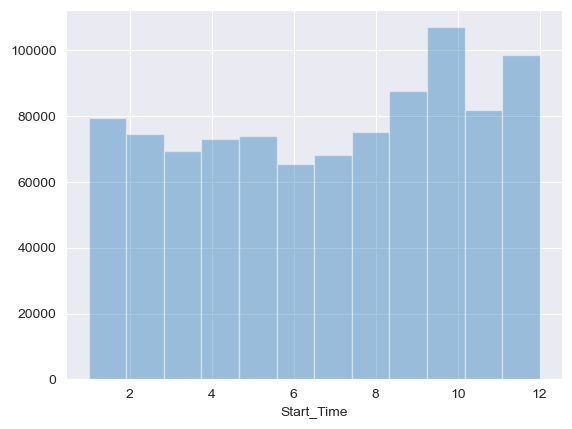

In [95]:
# Analyze accidents in the year 2019
df_2019= df[df.Start_Time.dt.year== 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False)

In [105]:
# Analyze the data sources in the dataset
print(df.Source.unique())

['Source2' 'Source3' 'Source1']


C:\Users\amith\AppData\Local\Temp\ipykernel_23428\2968710837.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019_S1.Start_Time.dt.month, bins=12, kde=False)


<Axes: xlabel='Start_Time'>

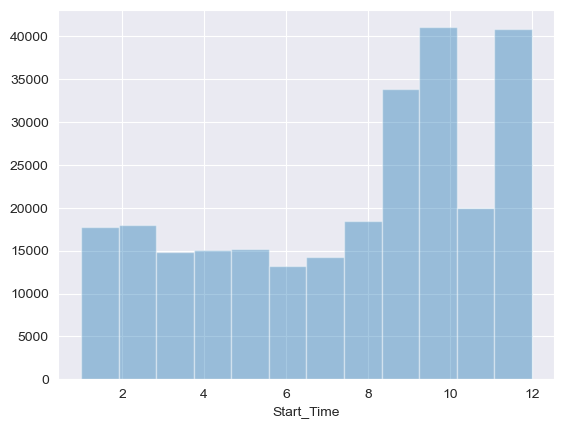

In [150]:
# Analyze accidents in 2019 by source
df_2019_S1= df_2019[df_2019.Source=='Source1']
sns.distplot(df_2019_S1.Start_Time.dt.month, bins=12, kde=False)

C:\Users\amith\AppData\Local\Temp\ipykernel_23428\200333343.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019_S2.Start_Time.dt.month, bins=12, kde=False)


<Axes: xlabel='Start_Time'>

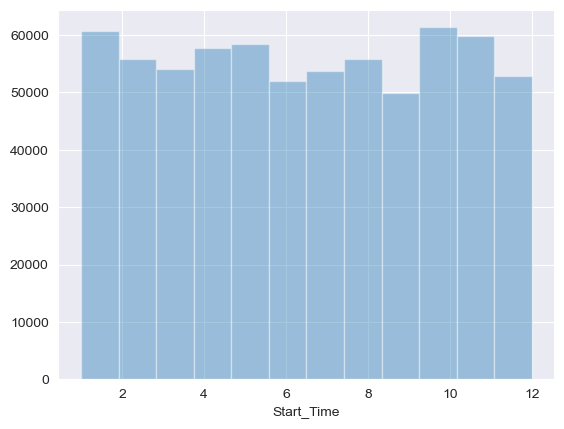

In [109]:
df_2019_S2=df_2019[df_2019.Source == 'Source2']
sns.distplot(df_2019_S2.Start_Time.dt.month, bins=12, kde=False)

In [151]:
# Visualize the proportions of different data sources
df.Source.value_counts().plot(kind='pie')

#start lat and lon

In [111]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7667550, dtype: float64

In [113]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7667550, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

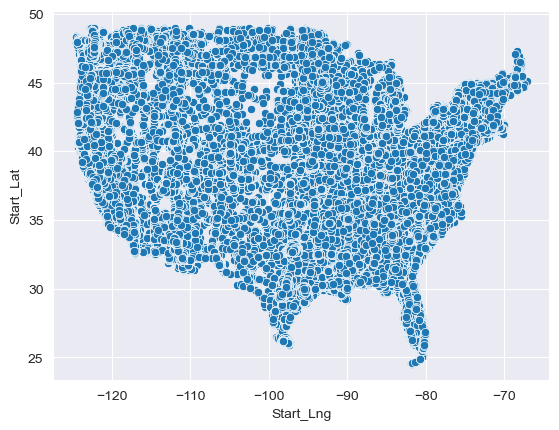

In [115]:
# Scatter plot of accident locations
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

In [116]:
# Create a smaller sample for visualization
sample_df=df.sample(int(0.1* len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

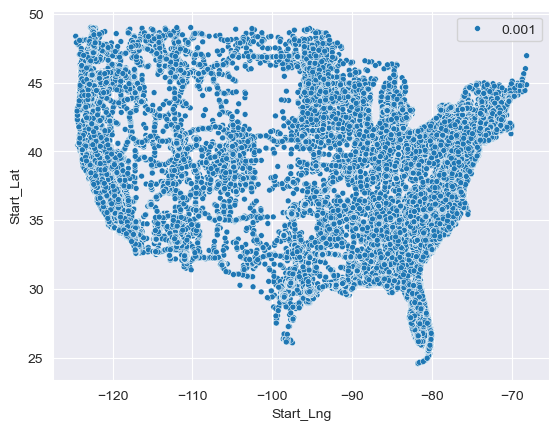

In [118]:
# Scatter plot for a sampled subset of accident locations
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [121]:
pip install folium

   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   ------------------------------------- -- 102.4/110.5 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 110.5/110.5 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [137]:
# Import folium for creating interactive maps
import folium
from folium.plugins import HeatMap

In [138]:
lat, lon =df.Start_Lat[0], df.Start_Lng[0]

In [139]:
for x in df[['Start_Lat','Start_Lng']].sample(100).items():
    print(x[1])

409322     33.882660
5048581    45.636048
3298855    29.870131
4304150    41.807474
385484     32.767242
             ...    
727147     41.991169
1353696    25.978600
3211535    29.679543
7639916    41.096619
2699792    37.305061
Name: Start_Lat, Length: 100, dtype: float64
409322    -117.544579
5048581   -108.909707
3298855    -95.329910
4304150    -87.724767
385484     -96.895882
              ...    
727147     -83.328056
1353696    -80.391800
3211535    -95.440063
7639916    -96.253310
2699792    -80.071869
Name: Start_Lng, Length: 100, dtype: float64


In [140]:
list(zip(df.Start_Lat, df.Start_Lng))

[(39.865147, -84.058723),
 (39.92805900000001, -82.831184),
 (39.063148, -84.032608),
 (39.747753, -84.20558199999998),
 (39.627781, -84.188354),
 (40.10059, -82.92519399999998),
 (39.758274, -84.23050699999997),
 (39.770382, -84.194901),
 (39.778061, -84.172005),
 (40.10059, -82.92519399999998),
 (39.952812, -83.119293),
 (39.932709, -82.83091),
 (39.737633, -84.14993299999998),
 (39.79076, -84.241547),
 (39.972038, -82.913521),
 (39.745888, -84.17041),
 (39.748329, -84.224007),
 (39.752174, -84.239952),
 (39.740669, -84.184135),
 (39.790703, -84.244461),
 (40.052509, -82.88233199999998),
 (39.773346, -84.224686),
 (39.628288, -84.226151),
 (40.023487, -82.994888),
 (39.761379, -84.25921600000002),
 (40.158024, -82.641762),
 (39.733219, -84.159653),
 (39.775303, -84.200523),
 (39.789322, -84.23910500000002),
 (39.75872, -84.183762),
 (40.081459, -83.122398),
 (39.83321, -84.112946),
 (40.042725, -82.99730699999998),
 (39.974415, -82.848854),
 (39.994766, -83.02449),
 (40.006477, -83.0

In [144]:
# Create a list of latitude and longitude pairs for heatmap visualization
sample_df=df.sample(int(0.0001*len(df)))
lat_lng_pairs=list(zip(sample_df.Start_Lat, sample_df.Start_Lng))

In [146]:
# Create a base map
map = folium.Map()
# Add the heatmap layer
HeatMap(lat_lng_pairs).add_to(map)
# Display the map
map

#summary and conclusions
Insights
1. No data from new york
2. The number of accidents per city decreases/increases exponentially
3. Less than 8% of cities have more than 1000 yearly accidents
4. less than 9% of cities have less than 1000 yesrly accidents
5. Nearly 1023 cities have reported just 1 accident(need to investigate)
6. Most accidents happen between 6 to 10 AM mightbe hurry to work
7. Next highest percentage is 3 to 6 PM back to home or some thing
8. On sundays/ saturdays the peak accidents occurs betweek 10 to 3PM unlike weekdays(monday)
9. This seems some issue with Source1 data